# Telco Customer Churn Analysis

## 1. Data Cleaning

In [1]:
import pandas as pd

# Load raw data
input_file = "data/telco_customer_churn.csv"
df = pd.read_csv(input_file)

# Initial overview
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

# Drop customerID column
df.drop(columns=['customerID'], inplace=True)

# Convert TotalCharges to numeric, drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Convert SeniorCitizen 0/1 to No/Yes
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Save cleaned data
output_file = "data/cleaned_data.csv"
df.to_csv(output_file, index=False)

print("\nData cleaned and saved.")


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

## 2. Exploratory Data Analysis (EDA)

Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 no

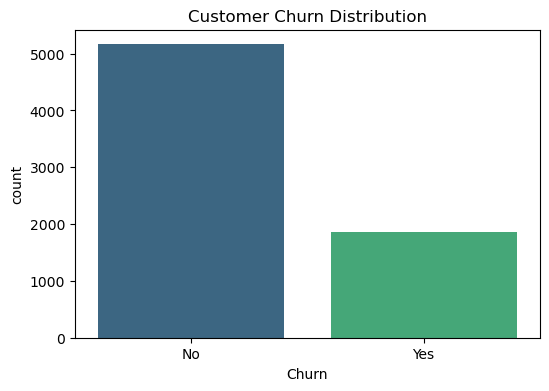

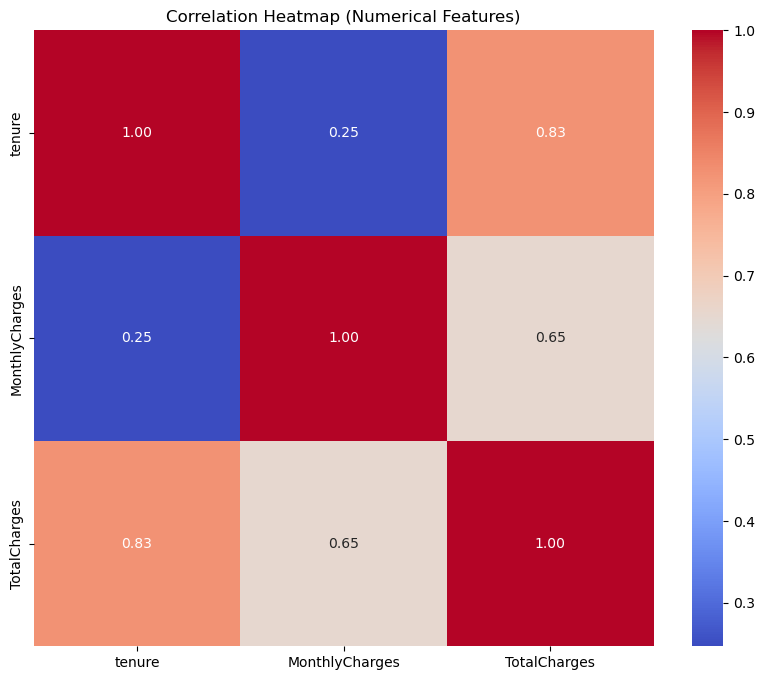

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("data/cleaned_data.csv")

# Basic data overview
print("Basic Data Info:")
print(df.info())

print("\nData Summary:")
print(df.describe())

print("\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True))

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', dodge=False, legend=False)
plt.title("Customer Churn Distribution")
plt.show()

# Correlation heatmap for numerical features
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


## 3. Customer Segmentation

Churn                                No  Yes
Tenure Group Monthly Charges Group          
0-12         Low                    464  136
             Medium                 299  228
             High                   322  508
             Very High               53  165
13-24        Low                    243   12
             Medium                 165   49
             High                   236  131
             Very High               86  102
25-48        Low                    343    8
             Medium                 251   34
             High                   388  132
             Very High              287  151
49-72        Low                    435    6
             Medium                 220   17
             High                   628   38
             Very High              743  152


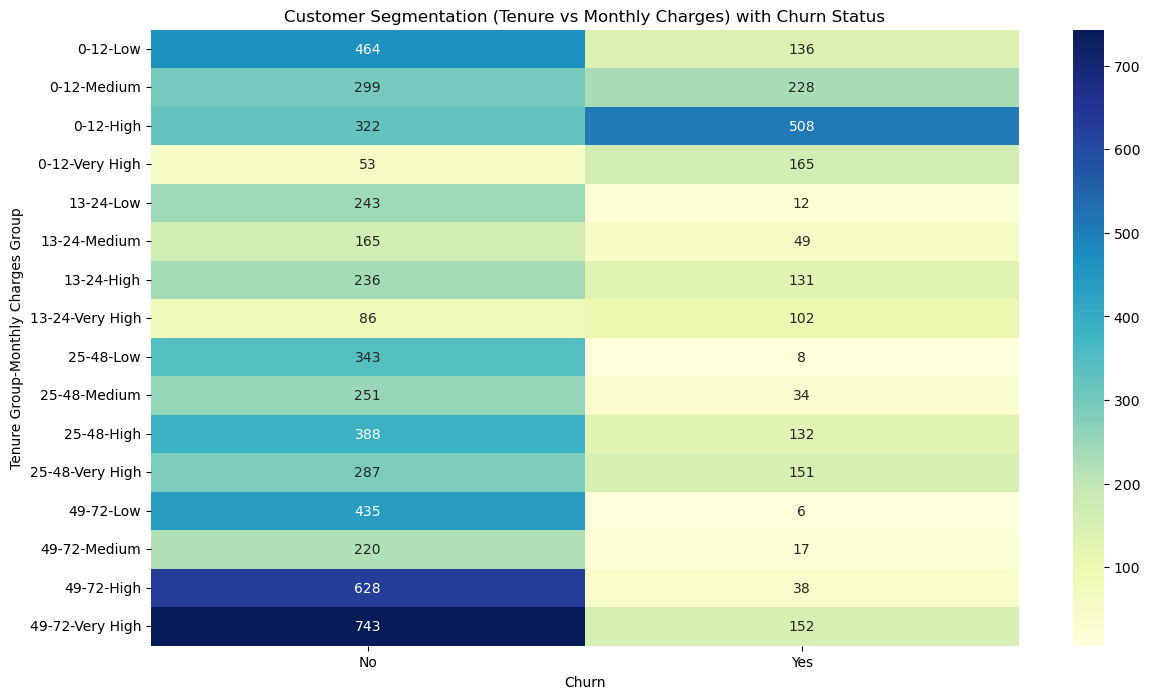

In [4]:
# Create tenure groups
df['Tenure Group'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-12','13-24','25-48','49-72'])

# Create monthly charges groups
df['Monthly Charges Group'] = pd.cut(df['MonthlyCharges'], bins=[0,30,60,90,120], labels=['Low','Medium','High','Very High'])

# Group by segments and churn
segment_summary = df.groupby(['Tenure Group', 'Monthly Charges Group', 'Churn'], observed=False).size().unstack().fillna(0)

# Display segmentation summary
print(segment_summary)

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(segment_summary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Customer Segmentation (Tenure vs Monthly Charges) with Churn Status")
plt.show()
